## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Reading the dataset

In [2]:
data = pd.read_csv('Project.csv')

In [3]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200920735,ALBERT corp,2019-05-29 00:00:00,2019.0,1.929320e+09,2019-05-14,20190515,20190514,20190529.0,USD,RV,1.0,NaN,49103.98,20190514.0,NAA8,1.929320e+09,0
1,U001,0200762301,C&S WH in,2019-09-12 00:00:00,2019.0,1.929802e+09,2019-08-28,20190827,20190828,20190912.0,USD,RV,1.0,NaN,16064.37,20190828.0,NAC6,1.929802e+09,0
2,U001,0200974851,RESTA,2019-03-22 00:00:00,2019.0,1.928924e+09,2019-03-07,20190307,20190307,20190322.0,USD,RV,1.0,NaN,14039.99,20190307.0,NAA8,1.928924e+09,0
3,CA02,0140105686,SYSC corp,2019-07-25 00:00:00,2019.0,2.960565e+09,2019-07-11,20190711,20190711,20190721.0,CAD,RV,1.0,NaN,80.50,20190711.0,CA10,2.960565e+09,0
4,CA02,140104249,SOB,NaN,2020.0,2.960629e+09,2020-04-18,20200418,20200418,20200506.0,CAD,RV,1.0,NaN,95669.64,20200426.0,CA10,2.960629e+09,1


#### Checking the dataframe information such as data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

#### Checking columns with null values

In [5]:
data.isnull().mean()

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.20000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
document type             0.00000
posting_id                0.00000
area_business             1.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00004
isOpen                    0.00000
dtype: float64

####  20% of 'clear date' is null so we can use these for test set and we can also see that 'area_business' has 100% null values , so we can drop that column. Along with this we can also drop 'document_create_date' because we are being provided with the normalised version of this feature i.e 'document_create_date.1'



In [6]:
data.drop(labels = ['area_business','document_create_date'], axis = 1, inplace = True)

#### On Comparing 'doc_id' and 'invoice_id' we observed that except for 2 entries rest of them matches with each other so either we can drop 'doc_id' or 'invoice_id'. Checking with the null() condition 'invoice_id' feature contains 2 of them. So we droped 'invoice_id.'

In [7]:
count = 0
for i in range(data.shape[0]):
    if data.loc[i, 'invoice_id'] != data.loc[i, 'doc_id']:
        count = count + 1
print(count)

2


In [8]:
#dropping feature invoice_id
data.drop('invoice_id', axis = 1, inplace = True)

In [9]:
#Finding out the columns having date
date_features = []
for cols in data.columns:
    if 'year' in cols or 'date' in cols:
        date_features.append(cols)
print(date_features)

['clear_date', 'buisness_year', 'posting_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date']


#### Separating out the date features with float, object and integer data types

In [10]:
date_float_int=[]
for col in date_features:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        date_float_int.append(col)
date_object = [col for col in date_features if col not in date_float_int]
print(date_float_int)
print(date_object)

['buisness_year', 'document_create_date.1', 'due_in_date', 'baseline_create_date']
['clear_date', 'posting_date']


In [11]:
# We don't need to convert 'business_year' dtype to datetime because this will help in creating train and validation set.
date_float_int.remove('buisness_year')

#### Convert these date features to datetime variables

In [12]:
for col in date_float_int:
    data[col] = pd.to_datetime(data[col], format = "%Y%m%d")

In [13]:
#Convert date features having object data type to datetime

for col in date_object:
    data[col] = pd.to_datetime(data[col])

In [14]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200920735,ALBERT corp,2019-05-29,2019.0,1.929320e+09,2019-05-14,2019-05-14,2019-05-29,USD,RV,1.0,49103.98,2019-05-14,NAA8,0
1,U001,0200762301,C&S WH in,2019-09-12,2019.0,1.929802e+09,2019-08-28,2019-08-28,2019-09-12,USD,RV,1.0,16064.37,2019-08-28,NAC6,0
2,U001,0200974851,RESTA,2019-03-22,2019.0,1.928924e+09,2019-03-07,2019-03-07,2019-03-22,USD,RV,1.0,14039.99,2019-03-07,NAA8,0
3,CA02,0140105686,SYSC corp,2019-07-25,2019.0,2.960565e+09,2019-07-11,2019-07-11,2019-07-21,CAD,RV,1.0,80.50,2019-07-11,CA10,0
4,CA02,140104249,SOB,NaT,2020.0,2.960629e+09,2020-04-18,2020-04-18,2020-05-06,CAD,RV,1.0,95669.64,2020-04-26,CA10,1


#### Sorting the dataframe with respect to 'posting_date'

In [15]:
data.sort_values('posting_date', inplace = True, ignore_index= True)  # inplace helps in changing the content directly without creating a copy .

In [16]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,185.10,2018-12-30,NAA8,0
1,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,7552.27,2018-12-30,NAH4,0
2,U001,0200769623,WAL-MAR us,2019-01-17,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,9655.40,2018-12-30,NAH4,0
3,U001,0200707822,PUBLI llc,2019-01-14,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,123088.74,2018-12-30,NAA8,0
4,U001,0200769623,WAL-MAR in,2019-01-16,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,572.48,2018-12-30,NAH4,0


In [17]:
data.tail()
#Successfully sorted the dataframe

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
49995,CA02,140106376,ISLAND associates,NaT,2020.0,2.960634e+09,2020-05-14,2020-05-14,2020-05-31,CAD,RV,1.0,5193.94,2020-05-21,CA10,1
49996,U001,100030964,NATURA us,NaT,2020.0,1.930908e+09,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,6692.21,2020-05-15,NAA8,1
49997,U001,0200763229,MAINES us,NaT,2020.0,1.930907e+09,2020-05-15,2020-05-15,2020-05-30,USD,RV,1.0,17140.86,2020-05-15,NAA8,1
49998,U001,0100036318,TFC us,NaT,2020.0,1.930910e+09,2020-05-15,2020-05-15,2020-05-25,USD,RV,1.0,3918.60,2020-05-15,NA10,1
49999,U001,200956366,RICH systems,NaT,2020.0,1.930910e+09,2020-05-21,2020-05-21,2020-06-05,USD,RV,1.0,42360.00,2020-05-21,NAA8,1


In [18]:
#Finding number of unique values in the dataset/ removing duplicates
data.duplicated().sum()


1200

In [19]:
data = data.drop_duplicates(keep = 'first')
data.shape

(48800, 16)

In [20]:
data.nunique()

business_code                 6
cust_number                1383
name_customer              4159
clear_date                  399
buisness_year                 2
doc_id                    48800
posting_date                501
document_create_date.1      501
due_in_date                 551
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         44206
baseline_create_date        501
cust_payment_terms           76
isOpen                        2
dtype: int64

#### From above observation only two entries uniquely exist for 4 features . We can draw out few analysis -> Starting with 'invoice_currency'..

####  The total open amounts having CAD as currency in invoice will be converted to their equivalent USD value.

###### 1 USD = 1.25 CAD

In [23]:
data['total_open_amount_conv']=data['total_open_amount']
for i in range(data.shape[0]):
    if data.loc[i,'invoice_currency']=="CAD":
        data.loc[i,'total_open_amount_conv']=data.loc[i,'total_open_amount_conv']/1.25
    else:
        data.loc[i,'total_open_amount_conv']=data.loc[i,'total_open_amount_conv']

KeyError: 105

#### Let's divide the dataset into train and main test set

#### Separating the test set

In [158]:
test = data[data['isOpen'] == 1]
test.reset_index(drop = True, inplace = True)

#### Saving the main test in a separate csv file

In [159]:
test.to_csv('Main_Test.csv')

#### Separating the combination of train and validation sets

In [160]:
df = data[data['isOpen'] == 0]

## Let's remove anomalies from date features

In [161]:
df['due-create'] = (df['due_in_date'] - df['document_create_date.1']) / np.timedelta64(1, 'D')
df['clear-create'] = (df['clear_date'] - df['document_create_date.1']) / np.timedelta64(1, 'D')
df['due-base'] = (df['due_in_date'] - df['baseline_create_date']) / np.timedelta64(1, 'D')
df['clear-base'] = (df['clear_date'] - df['baseline_create_date']) / np.timedelta64(1, 'D')

#### Let's get the count of each anomaly

In [162]:
print('Baseline date greater than due date ', df[df['due-base']<0].shape[0])
print('Baseline date greater than clear date ', df[df['clear-base']<0].shape[0])
print('Create date greater than due date ', df[df['due-create']<0].shape[0])
print('Create date greater than clear date', df[df['clear-create']<0].shape[0])

Baseline date greater than due date  0
Baseline date greater than clear date  5
Create date greater than due date  104
Create date greater than clear date 0


#### Around 109 anomalies are present there in total

#### As we have around 50000 rows, so removing these anomalies won't create much difference in the prediction process

In [163]:
df = df[df['clear-base'] >= 0]
df = df[df['due-create'] >= 0]

#### Resetting the index after dropping the rows which contain anomaly

In [164]:
data.reset_index(inplace = True, drop = True)

### As of now most of the anomalies have been removed or resolved, let's divide the combined train dataset into train set and a dataset comprising of val1 and val2

###### Intuition to divide the dataset is like - size of test dataset is rougly equal to the size of val 1 and val 2 datasets and the rest is train dataset

##### Let us keep all the records till 2019-11-30 in our train dataset

In [165]:
train = df[df['document_create_date.1'] <= '2019-11-30']

##### The rest of the data comes under val1 + val2 dataset

In [166]:
val12 = df[df['document_create_date.1'] > '2019-11-30']
val12.to_csv('Validation Set.csv')

In [167]:
train.shape

(33059, 22)

###### We have successfully divided the dataset

In [168]:
data.nunique()

business_code                 6
cust_number                1383
name_customer              4159
clear_date                  399
buisness_year                 2
doc_id                    48800
posting_date                501
document_create_date        505
document_create_date.1      501
due_in_date                 551
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         44206
baseline_create_date        501
cust_payment_terms           76
isOpen                        2
total_open_amount_conv    44225
dtype: int64

##### As we can clearly see there are two constant columns, isOpen and posting_id.

##### As they won't play any role in the prediction process, we can therefore remove these two columns straight away

In [169]:
train.drop(['posting_id', 'isOpen'], axis = 1, inplace = True)

# Finally making the delay column, our main point of focus

In [170]:
train['delay'] = (train['clear_date'] - train['due_in_date']) / np.timedelta64(1, 'D')

# EXPLORATORY DATA ANALYSIS (EDA)

Let us explore the data!

<AxesSubplot:xlabel='business_code', ylabel='count'>

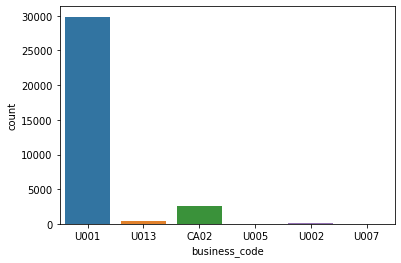

In [171]:
sns.countplot(x = 'business_code', data = train)

###### U001 has the maximum data points, and then comes CA02 and then U013

<AxesSubplot:ylabel='total_open_amount'>

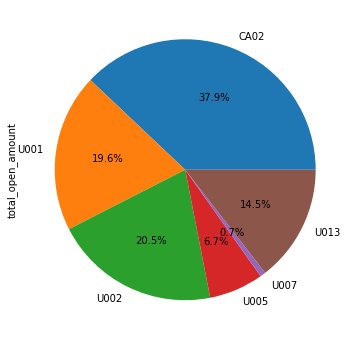

In [172]:
plt.figure(figsize=(6,6))
train.groupby("business_code")['total_open_amount'].mean().plot.pie(autopct="%.1f%%")

###### Though U001 has maximum data points, but CA02 has maximum mean amount of total_open_amounts

<AxesSubplot:ylabel='total_open_amount'>

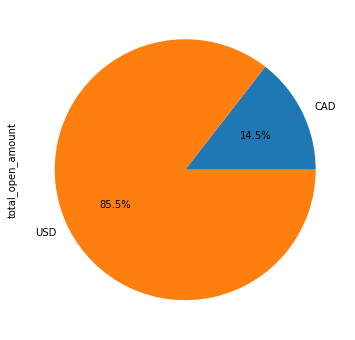

In [173]:
plt.figure(figsize=(6,6))
train.groupby("invoice_currency")['total_open_amount'].sum().plot.pie(autopct="%.1f%%")

###### As we can see, invoice currency having USD units have around 85.4% of total_open_amounts

<AxesSubplot:ylabel='total_open_amount'>

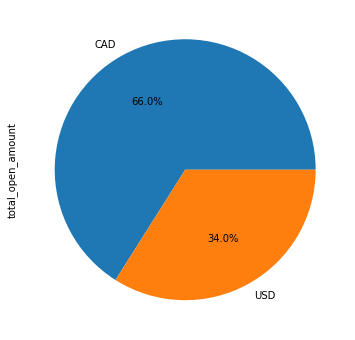

In [174]:
plt.figure(figsize=(6,6))
train.groupby("invoice_currency")['total_open_amount'].mean().plot.pie(autopct="%.1f%%")

###### As we can see, CAD has made less number of transactions but was the one to place transactions for huge amounts at one go

<AxesSubplot:ylabel='delay'>

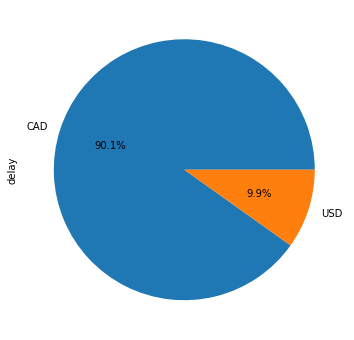

In [175]:
plt.figure(figsize=(6,6))
train.groupby("invoice_currency")['delay'].mean().plot.pie(autopct="%.1f%%")

###### Invoice currencies with currency unit of CAD have the highest delays

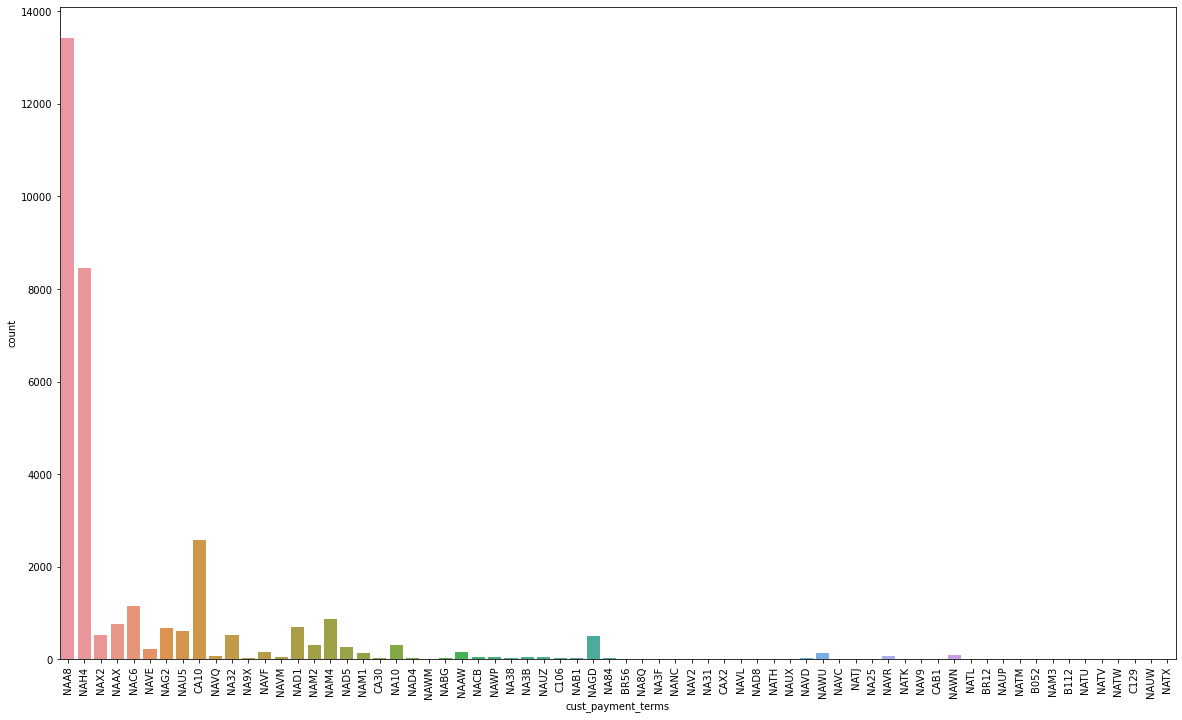

In [176]:
plt.figure(figsize = (20, 12))
sns.countplot(x = 'cust_payment_terms', data = train)
plt.xticks(rotation = 90)
plt.show()

###### NAA8 has been assigned as the most frequently used cust_payment_terms, which is followed by NAH4 and then finally by CA10

<AxesSubplot:xlabel='document type', ylabel='count'>

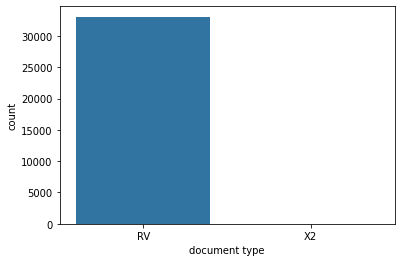

In [177]:
sns.countplot(x = 'document type', data = train)

###### As we can see, majority of dataset have RV as the assigned document type

### To visualize even more deeply, we will need some other features

###### Let's make those other useful features

###### Extracting day, month, year and day of week for due dates and clear dates

In [178]:
#creating new features to visualize in depth
train['due_day'] = train['due_in_date'].dt.day
train['due_month'] = train['due_in_date'].dt.month
train['due_year'] = train['due_in_date'].dt.year
train['due_dayweek'] = train['due_in_date'].dt.dayofweek
train['clear_day'] = train['clear_date'].dt.day
train['clear_month'] = train['clear_date'].dt.month
train['clear_year'] = train['clear_date'].dt.year
train['clear_dayweek'] = train['clear_date'].dt.dayofweek

<AxesSubplot:xlabel='clear_day', ylabel='count'>

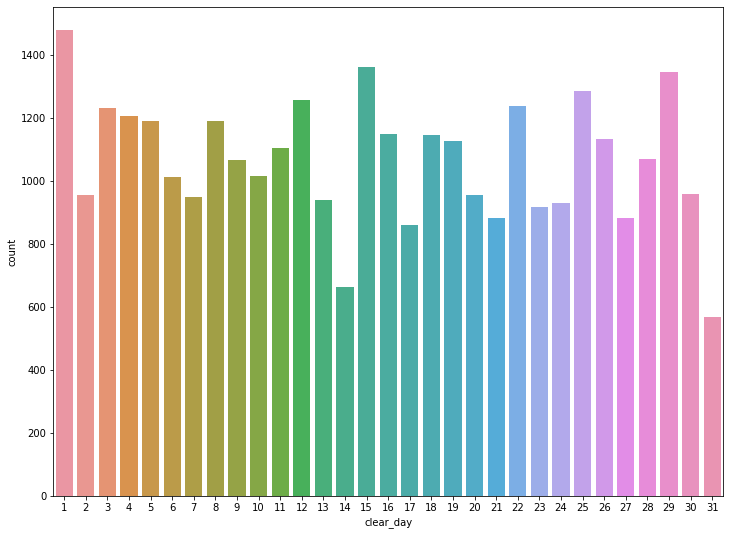

In [179]:
plt.figure(figsize = (12, 9))
sns.countplot(x = 'clear_day', data = train)

###### One very crucial thing to notice, most of the dues were clear in either first of every month or the fifteenth of every month

<AxesSubplot:xlabel='clear_dayweek', ylabel='count'>

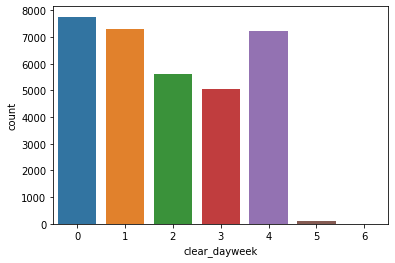

In [180]:
sns.countplot(x = 'clear_dayweek', data = train)

###### As the graph clearly says, weekdays have the most amount of invoices cleared, and almost negligible on weekends

<AxesSubplot:xlabel='clear_month', ylabel='count'>

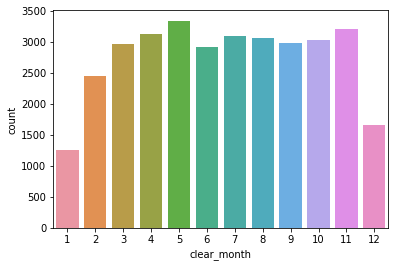

In [181]:
sns.countplot(x = 'clear_month', data = train)

###### As the graphs clearly says, most dues were paid in month of MAY while least number of dues were cleared in month of JANUARY

###### Tells us the human mentality and the effect of Holiday Season in the month of December, occassion like Christmas and New Year

<BarContainer object of 12 artists>

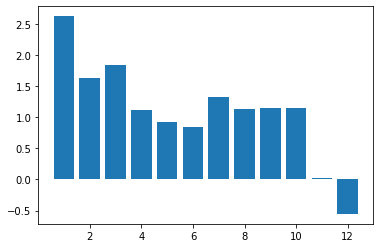

In [182]:
d = dict(train.groupby('due_month')['delay'].mean())
plt.bar(d.keys(), d.values())

###### Invoices having due dates in month of December have very the least delay, or to be more precise have no delay at all

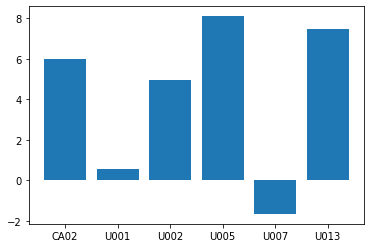

In [183]:
d = dict(train.groupby('business_code')['delay'].mean())
plt.bar(d.keys(), d.values())
plt.show()

###### U013 business codes have the highest delays while U007 have the least delays

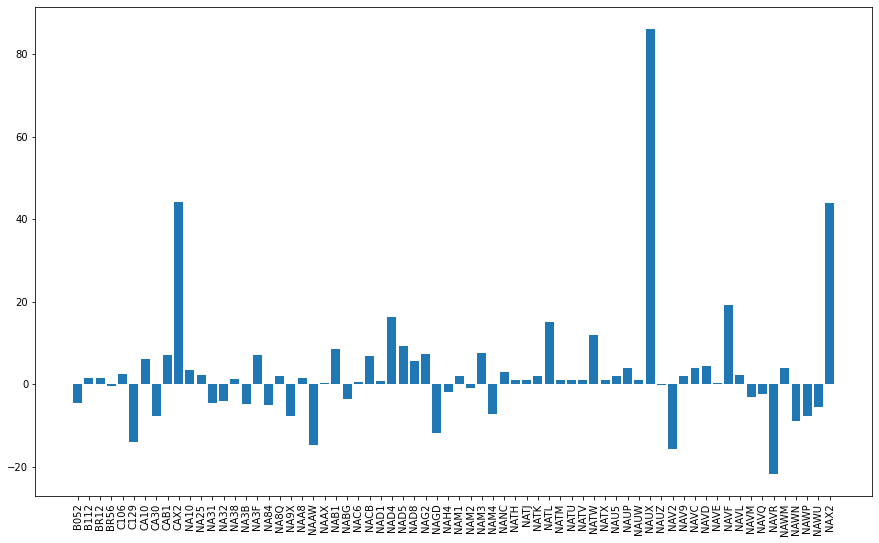

In [184]:
d = dict(train.groupby('cust_payment_terms')['delay'].mean())
plt.figure(figsize = (15, 9))
plt.bar(d.keys(), d.values())
plt.xticks(rotation = 90)
plt.show()

###### Invoices which are assigned as NAVR payment term have the least delay while NAUX have the highest delay

<AxesSubplot:xlabel='total_open_amount_conv', ylabel='Density'>

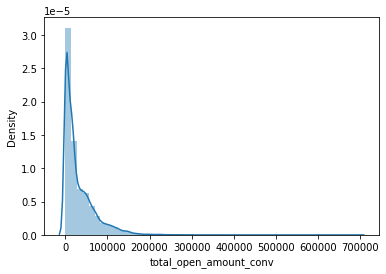

In [185]:
sns.distplot(train['total_open_amount_conv'])

##### The total_open_amount density plot looks like a right skewed or positively skewed plot.

In [186]:
due_date_month_list=list(train['due_month'])
delay_list=list(train['delay'])
season_list=[]
for i in range(len(due_date_month_list)):
    if i==1 or i==12 or i==11:
        season_list.append("Winter")
    elif i==2 or i==3 or i==4:
        season_list.append("Spring")
    elif i==7 or i==5 or i==6:
        season_list.append("Summer")
    else:
        season_list.append("Autumn")

[Text(0.5, 0, 'Season'), Text(0, 0.5, 'Delay')]

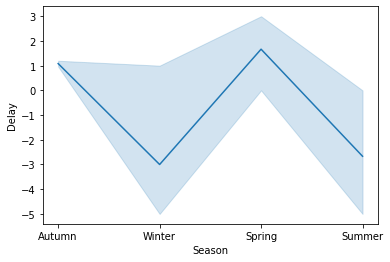

In [187]:
ax=sns.lineplot(x=season_list,y=delay_list)
ax.set(xlabel='Season', ylabel='Delay')

###### Spring and Summer season has no delays and the dues are cleared before the due date

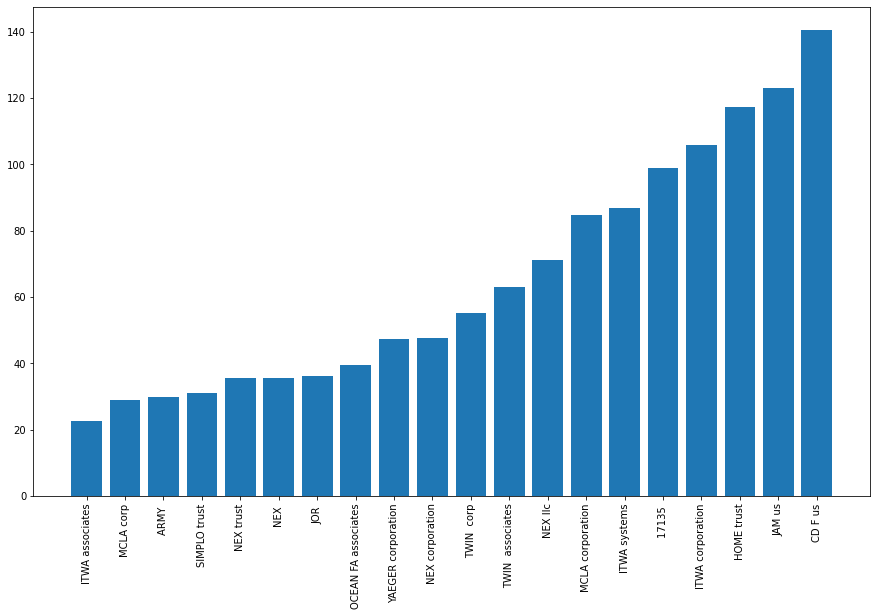

In [188]:
d = dict(train.groupby('name_customer')['total_open_amount'].mean().sort_values()[0:20])
plt.figure(figsize = (15, 9))
plt.bar(d.keys(), d.values())
plt.xticks(rotation = 90)
plt.show()

##### This plot shows the companies with the lowest mean total open amount.

##### Companies like ITWA associates, mcla corp, ARMY and SIMPLO trust associate us have very low mean total open amount

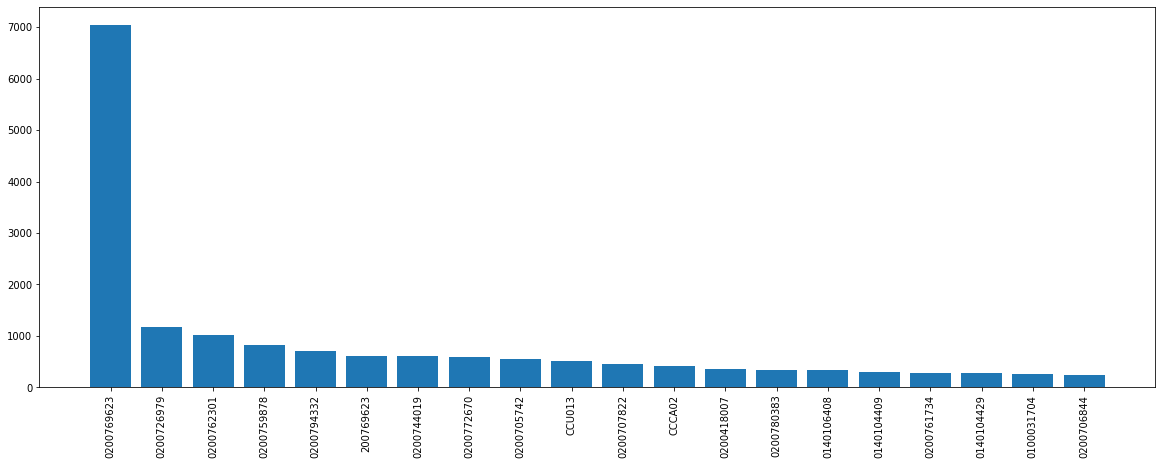

In [189]:
dict1 = dict(train.groupby('cust_number')['total_open_amount'].count().sort_values(ascending = False)[0:20])
plt.figure(figsize = (20, 7))
plt.bar(dict1.keys(), dict1.values())
plt.xticks(rotation = 90)
plt.show()

###### Customer Number 0200769623 has the highest number of invoices.

In [190]:
train[train['cust_number'] == '0200769623'].groupby("name_customer").nunique()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,clear-base,delay,due_day,due_month,due_year,due_dayweek,clear_day,clear_month,clear_year,clear_dayweek
name_customer,,,,,,,,,,,,,,,,,,,,,
WAL-MAR,1,1,211,1,651,289,278,289,289,1,...,20,20,31,12,1,7,31,12,1,5
WAL-MAR associates,1,1,210,1,618,282,272,282,281,1,...,17,16,31,12,1,7,31,12,1,5
WAL-MAR co,1,1,212,1,665,292,284,292,289,1,...,20,19,31,12,1,7,31,12,1,5
WAL-MAR corp,1,1,202,1,644,279,283,279,278,1,...,17,17,31,12,1,7,31,12,1,5
WAL-MAR corporation,1,1,207,1,630,289,272,289,289,1,...,21,21,31,12,1,7,31,12,1,5
WAL-MAR foundation,1,1,202,1,602,275,270,275,275,1,...,15,15,31,12,1,7,31,12,1,5
WAL-MAR in,1,1,205,1,634,275,279,275,276,1,...,22,22,31,12,1,7,31,12,1,5
WAL-MAR llc,1,1,203,1,594,264,271,264,264,1,...,16,16,31,12,1,7,31,12,1,5
WAL-MAR systems,1,1,203,1,615,275,274,275,275,1,...,19,19,31,12,1,7,31,12,1,5


###### As we can see, 0200769623 is associated to WAL-MAR group and is a frequest customer based on previous graph

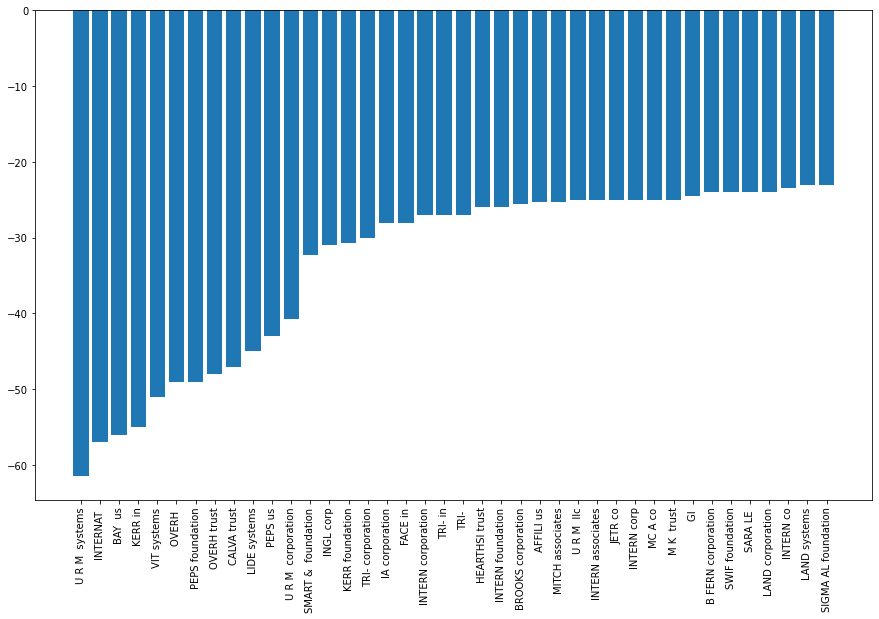

In [191]:
d = dict(train.groupby('name_customer')['delay'].mean().sort_values()[0:40])
plt.figure(figsize = (15, 9))
plt.bar(d.keys(), d.values())
plt.xticks(rotation = 90)
plt.show()

###### Based on above graph we see U R M systems of customers have the least mean delay

<AxesSubplot:xlabel='delay'>

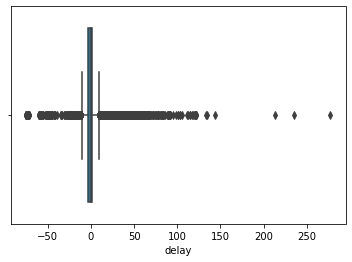

In [192]:
sns.boxplot(x="delay",data=train)

###### We see a lot of outliers in the delay, we will deal with it later

### We are done with exploring the data, and it's time now to do some feature engineering

# FEATURE ENGINEERING

###### As we saw 1st and 15th of every month had the highest amount of clear dues, so let's make a feature out of that observation

In [193]:
train['mean_of_schedule'] = df['cust_number'].map(dict(train.groupby('cust_number')['clear_day'].mean()))

In [194]:
train['median_of_schedule'] = df['cust_number'].map(dict(train.groupby('cust_number')['clear_day'].median()))

In [195]:
train['mode_of_schedule'] = df['cust_number'].map(dict(train.groupby(['cust_number'])['clear_day'].agg(lambda x: x.value_counts().index[0])))

In [196]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,due_month,due_year,due_dayweek,clear_day,clear_month,clear_year,clear_dayweek,mean_of_schedule,median_of_schedule,mode_of_schedule
0,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,1,2019,0,15,1,2019,1,14.923339,15.0,1.0
1,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,1,2019,0,9,1,2019,2,15.374805,15.0,22.0
2,U001,0200769623,WAL-MAR us,2019-01-17,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,1,2019,0,17,1,2019,3,15.374805,15.0,22.0
3,U001,0200707822,PUBLI llc,2019-01-14,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,1,2019,0,14,1,2019,0,15.147321,15.0,29.0
4,U001,0200769623,WAL-MAR in,2019-01-16,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,1,2019,0,16,1,2019,2,15.374805,15.0,22.0


###### Delay Ratio can be an important features where it is equal to number of invoices cleared with delay by total number of invoices for any customer number

In [197]:
no_of_invoices = dict(train.groupby('cust_number')['delay'].count())
df_t = train[train['delay'] <= 0]
no_delay = dict(df_t.groupby('cust_number')['delay'].count())
for keys in no_of_invoices.keys():
    if keys not in no_delay.keys():
        no_delay[keys] = 0
delay_ratio = {}
for keys in no_of_invoices.keys():
    delay_ratio[keys] = (no_of_invoices[keys] - no_delay[keys]) / no_of_invoices[keys]


In [198]:
train['delay_ratio'] = train['cust_number'].map(delay_ratio)

In [199]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,due_year,due_dayweek,clear_day,clear_month,clear_year,clear_dayweek,mean_of_schedule,median_of_schedule,mode_of_schedule,delay_ratio
0,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,2019,0,15,1,2019,1,14.923339,15.0,1.0,0.447189
1,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,2019,0,9,1,2019,2,15.374805,15.0,22.0,0.188041
2,U001,0200769623,WAL-MAR us,2019-01-17,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,2019,0,17,1,2019,3,15.374805,15.0,22.0,0.188041
3,U001,0200707822,PUBLI llc,2019-01-14,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,2019,0,14,1,2019,0,15.147321,15.0,29.0,0.352679
4,U001,0200769623,WAL-MAR in,2019-01-16,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,2019,0,16,1,2019,2,15.374805,15.0,22.0,0.188041


###### Average Delay - Average delay per customer number

###### Making the feature avg_delay_cust_number

In [200]:
train['avg_delay_cust_number'] = train['cust_number'].map(dict(train.groupby('cust_number')['delay'].mean()))

###### Let's do the same w.r.t business code

In [201]:
train['avg_delay_code'] = train['business_code'].map(dict(train.groupby('business_code')['delay'].mean()))

###### Let's do the same w.r.t payment terms

In [202]:
train['avg_delay_terms'] = train['cust_payment_terms'].map(dict(train.groupby('cust_payment_terms')['delay'].mean()))

###### Let's create a column where the average of the number of days available for cleaing dues is mapped with different payment terms

In [203]:
train['avg_pay_period_terms'] = train['cust_payment_terms'].map(dict(train.groupby('cust_payment_terms')['due-base'].mean()))

###### As we saw in one of the graphs, there are many custoers under a group of customer. For eg WAL-MAR.

###### There's a trend, the capital letters in the customer name is the group of the customers.

###### Let's work on filtering them

In [204]:
train.reset_index(drop = True, inplace = True)
caps_names = []
for i in range(train.shape[0]):
    flag = 0
    name = train.loc[i, 'name_customer']
    names = name.split(' ')
    for words in names:
        if words.isupper() == True:
            caps_names.append(words)
            flag = 1
            break
    if flag == 0:
        caps_names.append(name)
train['caps_names'] = caps_names       

###### Let's see how much can we simplify the data by filtering the group of customers from the data

In [205]:
print("Old number of unique customers: ", train['cust_number'].nunique())
print("Currently, number of unique customers: ", train['caps_names'].nunique())

Old number of unique customers:  1251
Currently, number of unique customers:  731


###### We see that we have reduced the number of unique customers this way and this can give us some valuable insights.

###### Let's calculate the mean of total open amount and delay on the feature created above

In [206]:
train['avg_delay_conv'] = train['caps_names'].map(dict(train.groupby('caps_names')['delay'].mean()))
train['avg_amount_conv'] = train['caps_names'].map(dict(train.groupby('caps_names')['total_open_amount_conv'].mean()))

###### Let us find the invoice count based on cust_number, names_customer and conpital_names w.r.t delay

In [207]:
train['invoice_count_cust_number'] = train['cust_number'].map(dict(train.groupby('cust_number')['delay'].count()))
train['invoice_count_name'] = train['name_customer'].map(dict(train.groupby('name_customer')['delay'].count()))
train['invoice_count_caps_names'] = train['caps_names'].map(dict(train.groupby('caps_names')['delay'].count()))

###### We see business code is a mixed variable, so it can be broken down and formed into two columns

In [208]:
codes_alpha, codes_digit = [], []
codes = list(train['business_code'])
for i in codes:
    alpha = ""
    digit = ""
    for letter in i:
        if letter.isalpha() == True:
            alpha = alpha + letter
        elif letter.isdigit() == True:
            digit = digit + letter
    if alpha == "":
        codes_alpha.append("*")
    else:
        codes_alpha.append(alpha)
    if digit == "":
        codes_digit.append("*")
    else:
        codes_digit.append(digit)

In [209]:
train['codes_alpha'] = codes_alpha
train['codes_digit'] = codes_digit

###### We see customer payment terms is also a mixed variable, so it can be also broken down and formed into two columns

In [210]:
terms_alpha, terms_digit = [], []
terms = list(train['cust_payment_terms'])
for i in terms:
    alpha = ""
    digit = ""
    for letter in i:
        if letter.isalpha() == True:
            alpha = alpha + letter
        elif letter.isdigit() == True:
            digit = digit + letter
    if alpha == "":
        terms_alpha.append("*")
    else:
        terms_alpha.append(alpha)
    if digit == "":
        terms_digit.append("*")
    else:
        terms_digit.append(digit)
train['terms_alpha'] = terms_alpha
train['terms_digit'] = terms_digit

In [211]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,caps_names,avg_delay_conv,avg_amount_conv,invoice_count_cust_number,invoice_count_name,invoice_count_caps_names,codes_alpha,codes_digit,terms_alpha,terms_digit
0,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,BJ'S,0.918941,4315.026364,1174,114,1246,U,001,NAA,8
1,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,WAL-MAR,-2.234134,22041.735605,7041,688,7658,U,001,NAH,4
2,U001,0200769623,WAL-MAR us,2019-01-17,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,WAL-MAR,-2.234134,22041.735605,7041,673,7658,U,001,NAH,4
3,U001,0200707822,PUBLI llc,2019-01-14,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,PUBLI,0.786307,69595.648548,448,31,482,U,001,NAA,8
4,U001,0200769623,WAL-MAR in,2019-01-16,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,WAL-MAR,-2.234134,22041.735605,7041,704,7658,U,001,NAH,4


###### As in one of the graphs in EDA, we saw how different season divided as per quarters can gave the inference that Spring had no delays.

###### So dividing the dataset on the basis of quarters of months of due date and then calculating mean of each quarter

In [212]:
train['due_quarter'] = train['due_in_date'].dt.quarter

In [213]:
train['due_quarter_avg'] = train['due_quarter'].map(dict(train.groupby('due_quarter')['delay'].mean()))

In [214]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,avg_amount_conv,invoice_count_cust_number,invoice_count_name,invoice_count_caps_names,codes_alpha,codes_digit,terms_alpha,terms_digit,due_quarter,due_quarter_avg
0,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,4315.026364,1174,114,1246,U,001,NAA,8,1,1.917638
1,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,22041.735605,7041,688,7658,U,001,NAH,4,1,1.917638
2,U001,0200769623,WAL-MAR us,2019-01-17,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,22041.735605,7041,673,7658,U,001,NAH,4,1,1.917638
3,U001,0200707822,PUBLI llc,2019-01-14,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,69595.648548,448,31,482,U,001,NAA,8,1,1.917638
4,U001,0200769623,WAL-MAR in,2019-01-16,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,22041.735605,7041,704,7658,U,001,NAH,4,1,1.917638


###### There can be a feature called gap between payments for each customer

In [215]:
gaps = {}
for x in train['cust_number'].unique():
    gaps[x] = []

In [216]:
for i in range(train.shape[0]):
    number = train.loc[i, 'cust_number']
    gaps[number].append(train.loc[i, 'clear_date'])

In [217]:
mean_gap = {}
for keys in gaps.keys():
    l = gaps[keys]
    val = 0
    if len(l) == 1:
        mean_gap[keys] = 0.0
    else:
        for i in range(1,len(l)):
            val = val + ((l[i]-l[i-1]) / np.timedelta64(1, 'D'))
        mean_gap[keys] = val / (len(l) - 1)
    

###### Let's map the average gaps between payment with the customer numbers

In [218]:
train['avg_pay_gap'] = train['cust_number'].map(mean_gap)

###### Let's calculate average payment period available for customer to clear the dues

In [219]:
train['avg_pay_period'] = train['cust_number'].map(dict(train.groupby('cust_number')['due-base'].mean()))

In [220]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,invoice_count_name,invoice_count_caps_names,codes_alpha,codes_digit,terms_alpha,terms_digit,due_quarter,due_quarter_avg,avg_pay_gap,avg_pay_period
0,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,114,1246,U,001,NAA,8,1,1.917638,0.285592,15.340716
1,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,688,7658,U,001,NAH,4,1,1.917638,0.047585,15.034796
2,U001,0200769623,WAL-MAR us,2019-01-17,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,673,7658,U,001,NAH,4,1,1.917638,0.047585,15.034796
3,U001,0200707822,PUBLI llc,2019-01-14,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,31,482,U,001,NAA,8,1,1.917638,0.751678,17.477679
4,U001,0200769623,WAL-MAR in,2019-01-16,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,704,7658,U,001,NAH,4,1,1.917638,0.047585,15.034796


In [221]:
train['avg_period_combined'] = (train['avg_pay_period'] + train['avg_delay_terms']) / 2

###### Let's make seasons based on due date

In [222]:
seasons = {
    12 : "Winter",
    1 : "Winter",
    2 : "Winter",
    3 : "Spring",
    4 : "Spring",
    5 : "Spring",
    6 : "Summer",
    7 : "Summer",
    8 : "Summer",
    9 : "Autumn",
    10 : "Autumn",
    11 : "Autumn"
}

train['seasons'] = train['due_month'].map(seasons)

###### We created a feature called gap between payments, earlier it was w.r.t to mean, let's do this time with median

In [223]:
median_gap = {}
for keys in gaps.keys():
    l = gaps[keys]
    val = []
    if len(l) == 1:
        median_gap[keys] = 0.0
    else:
        for i in range(1,len(l)):
            val.append((l[i]-l[i-1]) / np.timedelta64(1, 'D'))
        median_gap[keys] = pd.Series(val).median()
    

In [224]:
train['median_pay_gap'] = train['cust_number'].map(median_gap)

###### Let's make a feature terms_alpha_period where it is mapped as median of available time for payment w.r.t terms_alpha

In [225]:
train['terms_alpha_period'] = train['terms_alpha'].map(dict(train.groupby('terms_alpha')['due-base'].median()))

#### Let's check correlation

In [226]:
train.corr()

,buisness_year,doc_id,total_open_amount,total_open_amount_conv,due-create,clear-create,due-base,clear-base,delay,due_day,...,invoice_count_cust_number,invoice_count_name,invoice_count_caps_names,due_quarter,due_quarter_avg,avg_pay_gap,avg_pay_period,avg_period_combined,median_pay_gap,terms_alpha_period
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,NaN,1.000000,0.188401,0.117204,-0.093739,0.040501,-0.182351,-0.028575,0.137246,-0.002090,...,-0.167069,-0.179944,-0.184208,0.001453,0.000482,0.064541,-0.281266,-0.052830,0.049641,-0.196590
total_open_amount,NaN,0.188401,1.000000,0.993140,-0.071777,-0.054495,-0.102314,-0.079163,0.000792,-0.008584,...,-0.138807,-0.151686,-0.156735,0.031537,-0.027942,0.026175,-0.014472,0.041570,0.022860,-0.113476
total_open_amount_conv,NaN,0.117204,0.993140,1.000000,-0.067729,-0.056733,-0.092212,-0.076684,-0.005731,-0.008833,...,-0.133564,-0.146118,-0.151086,0.032882,-0.028640,0.028983,0.010302,0.050326,0.026292,-0.102827
due-create,NaN,-0.093739,-0.071777,-0.067729,1.000000,0.597532,0.981556,0.593234,-0.208259,-0.005777,...,-0.121857,-0.130226,-0.130072,0.071273,-0.101775,0.084148,0.612137,0.219354,0.070987,0.928946
clear-create,NaN,0.040501,-0.054495,-0.056733,0.597532,1.000000,0.567154,0.988991,0.659822,-0.014681,...,-0.217704,-0.236252,-0.228331,0.021297,-0.039462,0.080031,0.366253,0.477904,0.066292,0.522354
due-base,NaN,-0.182351,-0.102314,-0.092212,0.981556,0.567154,1.000000,0.591248,-0.228029,-0.002829,...,-0.117503,-0.122800,-0.122700,0.064886,-0.094760,0.071822,0.644451,0.214944,0.060684,0.956791
clear-base,NaN,-0.028575,-0.079163,-0.076684,0.593234,0.988991,0.591248,1.000000,0.650421,-0.012556,...,-0.217037,-0.233414,-0.225453,0.016813,-0.034795,0.071573,0.397645,0.480270,0.059218,0.553112
delay,NaN,0.137246,0.000792,-0.005731,-0.208259,0.659822,-0.228029,0.650421,1.000000,-0.012494,...,-0.151356,-0.166138,-0.156621,-0.040814,0.047241,0.018764,-0.126895,0.377377,0.014338,-0.233374
due_day,NaN,-0.002090,-0.008584,-0.008833,-0.005777,-0.014681,-0.002829,-0.012556,-0.012494,1.000000,...,-0.013820,-0.000038,0.000502,-0.081866,0.085289,0.004032,0.003805,0.008070,0.003984,0.000327


###### Let's make a feature codes_alpha_period where it is mapped as median of available time for payment w.r.t codes_alpha

In [227]:
train['codes_alpha_period'] = train['codes_alpha'].map(dict(train.groupby('codes_alpha')['due-base'].mean()))

###### Let's make a feature codes_period where it is mapped as median of available time for payment w.r.t business codes

In [228]:
train['codes_period'] = train['business_code'].map(dict(train.groupby('business_code')['due-base'].median()))

###### Let's make a feature where due date falls in a weekend, as we saw in graph, very few payments were made in weekends

In [229]:
train['isWeekend'] = train['due_dayweek'].map(lambda x: 1 if x == 5 or x == 6 else 0)

###### Let's encode month of due dates w.r.t mean delay of each month

In [230]:
train['month_enc'] = train['due_month'].map(dict(train.groupby('due_month')['delay'].mean()))

###### Let's encode seasons as mean delay of each season

In [231]:
train['season_enc'] = train['seasons'].map(dict(train.groupby('seasons')['delay'].mean()))

In [232]:
train.corr()

,buisness_year,doc_id,total_open_amount,total_open_amount_conv,due-create,clear-create,due-base,clear-base,delay,due_day,...,avg_pay_gap,avg_pay_period,avg_period_combined,median_pay_gap,terms_alpha_period,codes_alpha_period,codes_period,isWeekend,month_enc,season_enc
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,NaN,1.000000,0.188401,0.117204,-0.093739,0.040501,-0.182351,-0.028575,0.137246,-0.002090,...,0.064541,-0.281266,-0.052830,0.049641,-0.196590,-0.983629,-0.536898,0.060963,0.006413,-0.002868
total_open_amount,NaN,0.188401,1.000000,0.993140,-0.071777,-0.054495,-0.102314,-0.079163,0.000792,-0.008584,...,0.026175,-0.014472,0.041570,0.022860,-0.113476,-0.193965,-0.125825,-0.004695,-0.028266,-0.016399
total_open_amount_conv,NaN,0.117204,0.993140,1.000000,-0.067729,-0.056733,-0.092212,-0.076684,-0.005731,-0.008833,...,0.028983,0.010302,0.050326,0.026292,-0.102827,-0.121322,-0.085512,-0.007166,-0.029238,-0.017491
due-create,NaN,-0.093739,-0.071777,-0.067729,1.000000,0.597532,0.981556,0.593234,-0.208259,-0.005777,...,0.084148,0.612137,0.219354,0.070987,0.928946,0.101531,0.253095,0.000179,-0.101787,-0.038330
clear-create,NaN,0.040501,-0.054495,-0.056733,0.597532,1.000000,0.567154,0.988991,0.659822,-0.014681,...,0.080031,0.366253,0.477904,0.066292,0.522354,-0.028609,0.182251,0.008368,-0.030696,-0.013535
due-base,NaN,-0.182351,-0.102314,-0.092212,0.981556,0.567154,1.000000,0.591248,-0.228029,-0.002829,...,0.071822,0.644451,0.214944,0.060684,0.956791,0.191948,0.301203,-0.004156,-0.095477,-0.034720
clear-base,NaN,-0.028575,-0.079163,-0.076684,0.593234,0.988991,0.591248,1.000000,0.650421,-0.012556,...,0.071573,0.397645,0.480270,0.059218,0.553112,0.042028,0.222657,0.005073,-0.026489,-0.011008
delay,NaN,0.137246,0.000792,-0.005731,-0.208259,0.659822,-0.228029,0.650421,1.000000,-0.012494,...,0.018764,-0.126895,0.377377,0.014338,-0.233374,-0.130042,-0.014873,0.010039,0.057944,0.019410
due_day,NaN,-0.002090,-0.008584,-0.008833,-0.005777,-0.014681,-0.002829,-0.012556,-0.012494,1.000000,...,0.004032,0.003805,0.008070,0.003984,0.000327,0.002712,0.004295,-0.000020,0.162073,-0.002890


In [233]:
train.shape[0]

33059

###### Removing the rows which have delay greater than 150

In [234]:
train=train[train['delay']<=150]

In [235]:
train.reset_index(drop = True, inplace = True)

In [236]:
train.shape[0]

33056

###### Checking outliers for total open amount

<AxesSubplot:xlabel='total_open_amount_conv'>

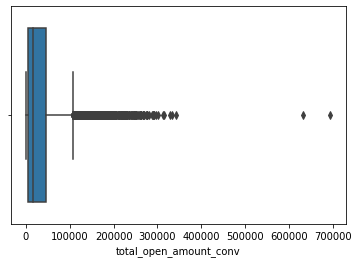

In [237]:
sns.boxplot(x="total_open_amount_conv",data=train)

###### Removing the outliers

In [238]:
train=train[train['total_open_amount_conv']<=500000]

In [239]:
train.reset_index(drop = True, inplace = True)

In [240]:
train['total_open_amount'].describe()

count     33054.000000
mean      31885.002487
std       38939.455145
min           1.030000
25%        4566.320000
50%       17030.035000
75%       46560.957500
max      416090.220000
Name: total_open_amount, dtype: float64

### Time to create the same features for our val1plusval2 dataset

In [241]:
val12 = pd.read_csv('Validation Set.csv')

In [242]:
val12.drop('Unnamed: 0', axis = 1, inplace = True)

In [243]:
val12.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,total_open_amount_conv,due-create,clear-create,due-base,clear-base
0,CA02,0140105847,GORDON F in,2019-12-17,2019.0,2.960597e+09,2019-12-01,2019-12-01,2019-12-01,2019-12-16,...,1.0,39177.35,2019-12-06,CA10,0,31341.88,15.0,16.0,10.0,11.0
1,U001,0200769623,WAL-MAR trust,2019-12-11,2019.0,1.930204e+09,2019-12-01,2019-11-30,2019-12-01,2019-12-16,...,1.0,75279.10,2019-12-01,NAH4,0,75279.10,15.0,10.0,15.0,10.0
2,U001,0200707822,PUBLI foundation,2019-12-16,2019.0,1.930208e+09,2019-12-01,2019-12-01,2019-12-01,2019-12-16,...,1.0,138393.92,2019-12-01,NAA8,0,138393.92,15.0,15.0,15.0,15.0
3,U001,0200769623,WAL-MAR llc,2019-12-11,2019.0,1.930207e+09,2019-12-01,2019-11-30,2019-12-01,2019-12-16,...,1.0,5514.90,2019-12-01,NAH4,0,5514.90,15.0,10.0,15.0,10.0
4,U001,0200769623,WAL-MAR,2019-12-17,2019.0,1.930207e+09,2019-12-01,2019-11-30,2019-12-01,2019-12-16,...,1.0,2620.93,2019-12-01,NAH4,0,2620.93,15.0,16.0,15.0,16.0


In [244]:
dates = []
for cols in val12.columns:
    if 'year' in cols or 'date' in cols:
        dates.append(cols)
print(dates)

['clear_date', 'buisness_year', 'posting_date', 'document_create_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date']


In [245]:
dates.remove('buisness_year')

In [246]:
for var in dates:
    val12[var] = pd.to_datetime(val12[var]) 

In [247]:
val12.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,total_open_amount_conv,due-create,clear-create,due-base,clear-base
0,CA02,0140105847,GORDON F in,2019-12-17,2019.0,2.960597e+09,2019-12-01,2019-12-01,2019-12-01,2019-12-16,...,1.0,39177.35,2019-12-06,CA10,0,31341.88,15.0,16.0,10.0,11.0
1,U001,0200769623,WAL-MAR trust,2019-12-11,2019.0,1.930204e+09,2019-12-01,2019-11-30,2019-12-01,2019-12-16,...,1.0,75279.10,2019-12-01,NAH4,0,75279.10,15.0,10.0,15.0,10.0
2,U001,0200707822,PUBLI foundation,2019-12-16,2019.0,1.930208e+09,2019-12-01,2019-12-01,2019-12-01,2019-12-16,...,1.0,138393.92,2019-12-01,NAA8,0,138393.92,15.0,15.0,15.0,15.0
3,U001,0200769623,WAL-MAR llc,2019-12-11,2019.0,1.930207e+09,2019-12-01,2019-11-30,2019-12-01,2019-12-16,...,1.0,5514.90,2019-12-01,NAH4,0,5514.90,15.0,10.0,15.0,10.0
4,U001,0200769623,WAL-MAR,2019-12-17,2019.0,1.930207e+09,2019-12-01,2019-11-30,2019-12-01,2019-12-16,...,1.0,2620.93,2019-12-01,NAH4,0,2620.93,15.0,16.0,15.0,16.0


In [248]:
val12 = val12[val12['due-create']>=0]
val12 = val12[val12['due-base']>=0]

In [249]:

val12.reset_index(inplace = True, drop = True)

In [250]:
val12.drop(['posting_id', 'isOpen'], axis = 1, inplace = True)

In [251]:
val12['delay'] = (val12['clear_date'] - val12['due_in_date']) / np.timedelta64(1, 'D')

In [252]:
val12['due_day'] = val12['due_in_date'].dt.day
val12['due_month'] = val12['due_in_date'].dt.month
val12['due_year'] = val12['due_in_date'].dt.year
val12['due_dayweek'] = val12['due_in_date'].dt.dayofweek
val12['clear_day'] = val12['clear_date'].dt.day
val12['clear_month'] = val12['clear_date'].dt.month
val12['clear_year'] = val12['clear_date'].dt.year
val12['clear_dayweek'] = val12['clear_date'].dt.dayofweek

In [253]:
val12['mean_of_schedule'] = val12['cust_number'].map(dict(train.groupby('cust_number')['clear_day'].mean()))
val12['median_of_schedule'] = val12['cust_number'].map(dict(train.groupby('cust_number')['clear_day'].median()))
val12['mode_of_schedule'] = val12['cust_number'].map(dict(train.groupby(['cust_number'])['clear_day'].agg(lambda x: x.value_counts().index[0])))

In [254]:
val12['delay_ratio'] = val12['cust_number'].map(delay_ratio)

In [255]:
val12['avg_delay_cust_number'] = val12['cust_number'].map(dict(train.groupby('cust_number')['delay'].mean()))

In [256]:
val12['avg_delay_code'] = val12['business_code'].map(dict(train.groupby('business_code')['delay'].mean()))

In [257]:
val12['avg_delay_terms'] = val12['cust_payment_terms'].map(dict(train.groupby('cust_payment_terms')['delay'].mean()))

In [258]:
val12['avg_pay_period_terms'] = val12['cust_payment_terms'].map(dict(train.groupby('cust_payment_terms')['due-base'].mean()))

In [259]:
caps_names = []
for i in range(val12.shape[0]):
    flag = 0
    name = val12.loc[i, 'name_customer']
    names = name.split(' ')
    for words in names:
        if words.isupper() == True:
            caps_names.append(words)
            flag = 1
            break
    if flag == 0:
        caps_names.append(name)
val12['caps_names'] = caps_names       

In [260]:
val12['avg_delay_conv'] = val12['caps_names'].map(dict(train.groupby('caps_names')['delay'].mean()))
val12['avg_amount_conv'] = val12['caps_names'].map(dict(train.groupby('caps_names')['total_open_amount_conv'].mean()))

In [261]:
val12['invoice_count_cust_number'] = val12['cust_number'].map(dict(train.groupby('cust_number')['delay'].count()))
val12['invoice_count_name'] = val12['name_customer'].map(dict(train.groupby('name_customer')['delay'].count()))
val12['invoice_count_caps_names'] = val12['caps_names'].map(dict(train.groupby('caps_names')['delay'].count()))

In [262]:
codes_alpha, codes_digit = [], []
codes = list(val12['business_code'])
for i in codes:
    alpha = ""
    digit = ""
    for letter in i:
        if letter.isalpha() == True:
            alpha = alpha + letter
        elif letter.isdigit() == True:
            digit = digit + letter
    if alpha == "":
        codes_alpha.append("*")
    else:
        codes_alpha.append(alpha)
    if digit == "":
        codes_digit.append("*")
    else:
        codes_digit.append(digit)
val12['codes_alpha'] = codes_alpha
val12['codes_digit'] = codes_digit

In [263]:
terms_alpha, terms_digit = [], []
terms = list(val12['cust_payment_terms'])
for i in terms:
    alpha = ""
    digit = ""
    for letter in i:
        if letter.isalpha() == True:
            alpha = alpha + letter
        elif letter.isdigit() == True:
            digit = digit + letter
    if alpha == "":
        terms_alpha.append("*")
    else:
        terms_alpha.append(alpha)
    if digit == "":
        terms_digit.append("*")
    else:
        terms_digit.append(digit)
val12['terms_alpha'] = terms_alpha
val12['terms_digit'] = terms_digit

In [264]:
val12['due_quarter'] = val12['due_in_date'].dt.quarter

In [265]:
val12['due_quarter_avg'] = val12['due_quarter'].map(dict(train.groupby('due_quarter')['delay'].mean()))

In [266]:
val12['avg_pay_gap'] = val12['cust_number'].map(mean_gap)

In [267]:
val12['avg_pay_period'] = val12['cust_number'].map(dict(train.groupby('cust_number')['due-base'].mean()))

In [268]:
val12['avg_period_combined'] = (val12['avg_pay_period'] + val12['avg_delay_terms']) / 2

In [269]:
val12['seasons'] = val12['due_month'].map(seasons)

In [270]:
val12['median_pay_gap'] = val12['cust_number'].map(median_gap)

In [271]:
val12['terms_alpha_period'] = val12['terms_alpha'].map(dict(train.groupby('terms_alpha')['due-base'].median()))

In [272]:
val12['codes_alpha_period'] = val12['codes_alpha'].map(dict(train.groupby('codes_alpha')['due-base'].mean()))

In [273]:
val12['codes_period'] = val12['business_code'].map(dict(train.groupby('business_code')['due-base'].median()))

In [274]:
val12['isWeekend'] = val12['due_dayweek'].map(lambda x: 1 if x == 5 or x == 6 else 0)

In [275]:
val12['month_enc'] = val12['due_month'].map(dict(train.groupby('due_month')['delay'].mean()))

In [276]:
val12['season_enc'] = val12['seasons'].map(dict(train.groupby('seasons')['delay'].mean()))

## Feature Selection

Now splitting the val + local test into validation set and local test set

In [277]:
val1 = val12[val12['document_create_date.1'] <= '2020-01-19']
val2 = val12[val12['document_create_date.1'] > '2020-01-19']

In [278]:
val2.reset_index(inplace = True, drop = True)

In [279]:
numerical_cols = [cols for cols in train.columns if train[cols].dtype == 'int64' or train[cols].dtype == 'float64']

In [280]:
object_cols = [cols for cols in train.columns if train[cols].dtype == 'object']

In [281]:
date_cols = [cols for cols in train.columns if train[cols].dtype == 'datetime64[ns]']

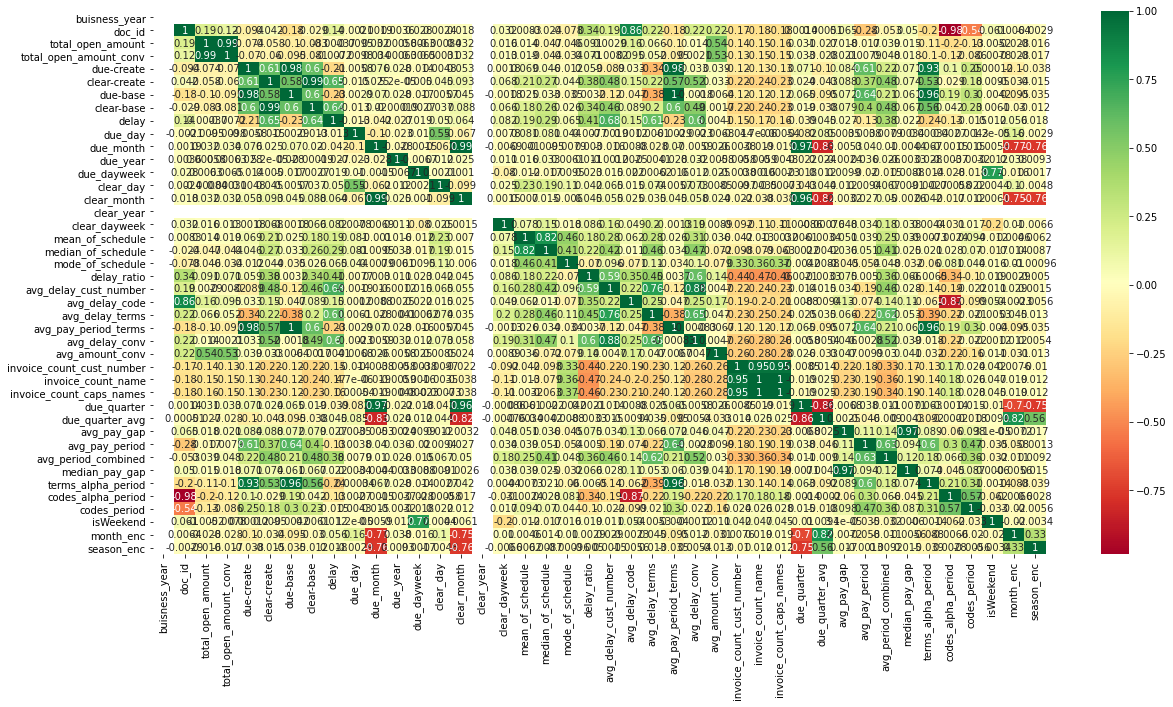

In [282]:
plt.figure(figsize = (20,10))
sns.heatmap(train[numerical_cols].corr(), annot = True, cmap='RdYlGn')
plt.show()

In [283]:
from sklearn.feature_selection import VarianceThreshold

#### Passing a value of zero for the parameter will filter all the features with zero variance

In [284]:
constant_filter = VarianceThreshold(threshold=0)

#### We need to simply apply this filter to our training set as shown in the following example

In [285]:
constant_filter.fit(train[numerical_cols])

VarianceThreshold(threshold=0)

#### The number of non-constant features.

In [286]:
numerical_columns = train[numerical_cols].columns[constant_filter.get_support()].values

In [287]:
filter_ = VarianceThreshold(threshold=0.95)
filter_.fit(train[numerical_columns])
numerical_columns2 = list(train[numerical_columns].columns[filter_.get_support()].values)

In [288]:
numerical_columns = list(numerical_columns)

In [289]:
train[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33054 entries, 0 to 33053
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   doc_id                     33054 non-null  float64
 1   total_open_amount          33054 non-null  float64
 2   total_open_amount_conv     33054 non-null  float64
 3   due-create                 33054 non-null  float64
 4   clear-create               33054 non-null  float64
 5   due-base                   33054 non-null  float64
 6   clear-base                 33054 non-null  float64
 7   delay                      33054 non-null  float64
 8   due_day                    33054 non-null  int64  
 9   due_month                  33054 non-null  int64  
 10  due_year                   33054 non-null  int64  
 11  due_dayweek                33054 non-null  int64  
 12  clear_day                  33054 non-null  int64  
 13  clear_month                33054 non-null  int

## Sequential Forward Selection (SFS)

In [290]:
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    sfs = SFS(LinearRegression(),
              k_features=15,
              forward=True,
              scoring = 'r2',
              cv = 5)
    sfs.fit(X, y)#doing the FFS
    
    return sfs.k_feature_names_

In [291]:
numerical_columns.remove('delay')

In [292]:
Y_train = train['delay']

In [293]:
numerical_columns.remove('clear-create')
numerical_columns.remove('clear-base')

In [294]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\sriva\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [295]:
FFS(train[numerical_columns], Y_train)

('total_open_amount',
 'due-create',
 'due-base',
 'due_day',
 'due_year',
 'due_dayweek',
 'clear_dayweek',
 'avg_delay_cust_number',
 'avg_delay_terms',
 'avg_pay_period_terms',
 'avg_amount_conv',
 'avg_pay_period',
 'avg_period_combined',
 'terms_alpha_period',
 'month_enc')

In [296]:
selected_features = list(
('total_open_amount',
 'due-create',
 'due-base',
 'due_day',
 'due_dayweek',
 'mean_of_schedule',
 'median_of_schedule',
 'avg_delay_cust_number',
 'avg_pay_period_terms',
 'avg_amount_conv',
 'avg_period_combined',
 'terms_alpha_period',
 'isWeekend',
 'month_enc',
 'codes_alpha_period'))

In [297]:
X_train_n = train[selected_features]
X_val_n = val1[selected_features]
X_test_n = val2[selected_features]

In [298]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_n = ss.fit_transform(X_train_n)
X_val_n = ss.transform(X_val_n)
X_test_n = ss.transform(X_test_n)

In [299]:
Y_val = val1['delay']
Y_test = val2['delay']

### Some of the columns in val1 and val2 have NaN values in some rows.

#### So filling those with mean values

###### First doing for val1

In [300]:
val1[['avg_pay_period', 'avg_pay_gap', 'avg_period_combined', 'median_pay_gap',
      'terms_alpha_period','invoice_count_cust_number', 'invoice_count_name',
      'invoice_count_caps_names']] = val1[['avg_pay_period', 'avg_pay_gap', 
                                           'avg_period_combined', 'median_pay_gap',
                                           'terms_alpha_period','invoice_count_cust_number',
                                           'invoice_count_name', 'invoice_count_caps_names']].fillna(0.0)

In [301]:
val1['mean_of_schedule'] = val1['mean_of_schedule'].fillna(train['mean_of_schedule'].mean())

In [302]:
val1['median_of_schedule'] = val1['median_of_schedule'].fillna(train['median_of_schedule'].mean())
val1['mode_of_schedule'] = val1['mode_of_schedule'].fillna(train['mode_of_schedule'].mean())

In [303]:
val1['delay_ratio'] = val1['delay_ratio'].fillna(train['delay_ratio'].mean())

In [304]:
val1['avg_delay_terms'] = val1['avg_delay_terms'].fillna(train['avg_delay_terms'].mean())
val1['avg_pay_period_terms'] = val1['avg_pay_period_terms'].fillna(train['avg_pay_period_terms'].mean())
val1['avg_delay_conv'] = val1['avg_delay_conv'].fillna(train['avg_delay_conv'].mean())
val1['avg_amount_conv'] = val1['avg_amount_conv'].fillna(train['avg_amount_conv'].mean())

In [305]:
val1['avg_delay_cust_number'] = val1['avg_delay_cust_number'].fillna(train['avg_delay_cust_number'].mean())

###### Now doing for val2, repeating the steps that were done for val1

In [306]:
val2[['avg_pay_period', 'avg_pay_gap', 'avg_period_combined', 'median_pay_gap', 'terms_alpha_period',
       'invoice_count_cust_number', 'invoice_count_name', 'invoice_count_caps_names']] = val2[['avg_pay_period', 'avg_pay_gap', 'avg_period_combined', 'median_pay_gap', 'terms_alpha_period',
       'invoice_count_cust_number', 'invoice_count_name', 'invoice_count_caps_names']].fillna(0.0)
val2['mean_of_schedule'] = val2['mean_of_schedule'].fillna(train['mean_of_schedule'].mean())
val2['median_of_schedule'] = val2['median_of_schedule'].fillna(train['median_of_schedule'].mean())
val2['mode_of_schedule'] = val2['mode_of_schedule'].fillna(train['mode_of_schedule'].mean())
val2['delay_ratio'] = val2['delay_ratio'].fillna(train['delay_ratio'].mean())
val2['avg_delay_terms'] = val2['avg_delay_terms'].fillna(train['avg_delay_terms'].mean())
val2['avg_pay_period_terms'] = val2['avg_pay_period_terms'].fillna(train['avg_pay_period_terms'].mean())
val2['avg_delay_conv'] = val2['avg_delay_conv'].fillna(train['avg_delay_conv'].mean())
val2['avg_amount_conv'] = val2['avg_amount_conv'].fillna(train['avg_amount_conv'].mean())
val2['avg_delay_cust_number'] = val2['avg_delay_cust_number'].fillna(train['avg_delay_cust_number'].mean())

##### Finally taking the X_val and X_test

In [307]:
X_val_n = val1[selected_features]
X_test_n = val2[selected_features]

In [308]:
X_val_n = ss.transform(X_val_n)
X_test_n = ss.transform(X_test_n)

# TRAINING AND TESTING

#### Linear Regression

In [309]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_n, Y_train)
preds = lr.predict(X_val_n)

In [310]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(preds, Y_val))

15.63185851161072

#### KNN

In [311]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train_n,Y_train)
preds = knn.predict(X_val_n)
np.sqrt(mean_squared_error(preds, Y_val))

6.455118717990739

#### XGBoost

In [312]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train_n,Y_train)
preds = xgb.predict(X_val_n)
np.sqrt(mean_squared_error(preds, Y_val))

6.921415126293956

##### LGBMRegressor

In [313]:
from lightgbm import LGBMRegressor
lg=XGBRegressor()
lg.fit(X_train_n,Y_train)
preds = lg.predict(X_val_n)
np.sqrt(mean_squared_error(preds, Y_val))

6.921415126293956

#### Random Forest Regression

In [314]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_n, Y_train)
pred = rfr.predict(X_val_n)
np.sqrt(mean_squared_error(pred, Y_val))

6.873965631235721

### HYPER-PARAMETER TUNING

##### Random Forest Regressor

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor()

In [194]:
lr.fit(X_train_n, Y_train)
pred = lr.predict(X_val_n)
np.sqrt(mean_squared_error(pred, Y_val))
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30],
 'n_estimators': [100, 200, 300, 400, 500]}
rf_random = GridSearchCV(estimator = lr, param_grid = params, verbose=2, n_jobs = -1)
rf_random.fit(X_train_n, Y_train)
preds = rf_random.predict(X_val_n)
np.sqrt(mean_squared_error(preds, Y_val))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


6.2549156841341

In [195]:
import pickle
with open('rfr_pickle_h','wb') as f:
    pickle.dump(rf_random,f)

In [207]:
preds = rf_random.predict(X_test_n)
np.sqrt(mean_squared_error(preds, Y_test))

7.780774682107303

##### K Neighbors Regressor

In [199]:
leaf_size = list(range(1,20,5))
n_neighbors = [1,3,5,7]
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
clf = GridSearchCV(knn, hyperparameters, cv=None)
best_model = clf.fit(X_train_n,Y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
preds = clf.predict(X_val_n)
np.sqrt(mean_squared_error(preds, Y_val))

Best leaf_size: 16
Best p: 1
Best n_neighbors: 7


6.295247876395955

In [206]:
preds = clf.predict(X_test_n)
np.sqrt(mean_squared_error(preds, Y_test))

8.55407773099946

In [202]:
import pickle
with open('knn_pickle_h','wb') as f:
    pickle.dump(clf,f)

##### LGBM Regressor

In [208]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
lg=LGBMRegressor()

In [209]:
param = {
    'num_leaves': [31,127],
    'reg_alpha': [0.1,0.5],
    'min_data_in_leaf': [30,50,100,300,400],
    'lambda_l1': [0,1,1.5],
    'lambda_l2': [0,1]
}
lg_grid=GridSearchCV(estimator=lg, verbose=2, param_grid=param,cv=2)
lg_grid.fit(X_train_n,Y_train)
preds = lg_grid.predict(X_val_n)
np.sqrt(mean_squared_error(preds, Y_val))

Fitting 2 folds for each of 120 candidates, totalling 240 fits
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[CV] END lambda_l1=0, lambda_l2=0, min_data_in_leaf=30, num_leaves=31, reg_alpha=0.1; total time=   0.1s
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[CV] END lambda_l1=0, lambda_l2=0, min_data_in_leaf=30, num_leaves=31, reg_alpha=0.1; total time=   0.0s
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored

6.124008806507536

In [430]:
preds = lg_grid.predict(X_test_n)
np.sqrt(mean_squared_error(preds, Y_test))

7.927397027694999

In [211]:
import pickle
with open('lgbm_pickle_h','wb') as f:
    pickle.dump(lg_grid,f)

## As we see, after performing hyperparamter tunning for LGBM Regressor, Random Forest Regression and K Neighbors Regression, the best result in the form of least Root Mean Squared Eror (RMSE) was given by LGBM Regression and gave a Root Mean Square Error of 7.92.

## So we will use this model to make the final predictions in our test data set and predict the clear dates and bucket it as per the delay predicted

# Making the required columns for MAIN TEST dataset

In [431]:
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,total_open_amount_conv
0,U001,0200965912,C&S W foundation,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,USD,RV,1.0,58547.56,2020-02-27,NAC6,1,58547.56
1,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930573e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,1322.22,2020-02-27,NAH4,1,1322.22
2,U001,0200762301,C&S WH co,NaT,2020.0,1.930573e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,122713.68,2020-02-27,NAC6,1,122713.68
3,U001,0200772595,SAFEW associates,NaT,2020.0,1.930569e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,1.0,58239.20,2020-02-27,NAA8,1,58239.20
4,U001,0200761734,H E BUT,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,94516.50,2020-02-27,NAA8,1,94516.50


In [432]:
test['due-create'] = (test['due_in_date'] - test['document_create_date.1']) / np.timedelta64(1, 'D')
test['due-base'] = (test['due_in_date'] - test['baseline_create_date']) / np.timedelta64(1, 'D')
test['due_day'] = test['due_in_date'].dt.day
test['due_dayweek'] = test['due_in_date'].dt.dayofweek
test['mean_of_schedule'] = test['cust_number'].map(dict(train.groupby('cust_number')['clear_day'].mean()))
test['median_of_schedule'] = test['cust_number'].map(dict(train.groupby('cust_number')['clear_day'].median()))
test['avg_delay_cust_number'] = test['cust_number'].map(dict(train.groupby('cust_number')['delay'].mean()))
test['avg_pay_period_terms'] = test['cust_payment_terms'].map(dict(train.groupby('cust_payment_terms')['due-base'].mean()))

In [433]:
caps_names = []
for i in range(test.shape[0]):
    flag = 0
    name = test.loc[i, 'name_customer']
    names = name.split(' ')
    for words in names:
        if words.isupper() == True:
            caps_names.append(words)
            flag = 1
            break
    if flag == 0:
        caps_names.append(name)
test['caps_names'] = caps_names 

test['avg_amount_conv'] = test['caps_names'].map(dict(train.groupby('caps_names')['total_open_amount_conv'].mean()))

In [434]:
test['avg_delay_terms'] = test['cust_payment_terms'].map(dict(train.groupby('cust_payment_terms')['delay'].mean()))
test['avg_pay_period'] = test['cust_number'].map(dict(train.groupby('cust_number')['due-base'].mean()))
test['avg_period_combined'] = (test['avg_pay_period'] + test['avg_delay_terms']) / 2

In [435]:
terms_alpha, terms_digit = [], []
terms = list(test['cust_payment_terms'])
for i in terms:
    alpha = ""
    digit = ""
    for letter in i:
        if letter.isalpha() == True:
            alpha = alpha + letter
        elif letter.isdigit() == True:
            digit = digit + letter
    if alpha == "":
        terms_alpha.append("*")
    else:
        terms_alpha.append(alpha)
    if digit == "":
        terms_digit.append("*")
    else:
        terms_digit.append(digit)
test['terms_alpha'] = terms_alpha
test['terms_digit'] = terms_digit
test['terms_alpha_period'] = test['terms_alpha'].map(dict(train.groupby('terms_alpha')['due-base'].median()))

In [436]:
test['isWeekend'] = test['due_dayweek'].map(lambda x: 1 if x == 5 or x == 6 else 0)

In [437]:
test['due_month'] = test['due_in_date'].dt.month
test['month_enc'] = test['due_month'].map(dict(train.groupby('due_month')['delay'].mean()))

In [438]:
codes_alpha, codes_digit = [], []
codes = list(test['business_code'])
for i in codes:
    alpha = ""
    digit = ""
    for letter in i:
        if letter.isalpha() == True:
            alpha = alpha + letter
        elif letter.isdigit() == True:
            digit = digit + letter
    if alpha == "":
        codes_alpha.append("*")
    else:
        codes_alpha.append(alpha)
    if digit == "":
        codes_digit.append("*")
    else:
        codes_digit.append(digit)
test['codes_alpha'] = codes_alpha
test['codes_digit'] = codes_digit

test['codes_alpha_period'] = test['codes_alpha'].map(dict(train.groupby('codes_alpha')['due-base'].mean()))

## Making X_maintest_new

In [439]:
X_maintest_n = test[selected_features]

In [440]:
X_maintest_n.isnull().sum()

total_open_amount          0
due-create                 0
due-base                   0
due_day                    0
due_dayweek                0
mean_of_schedule          98
median_of_schedule        98
avg_delay_cust_number     98
avg_pay_period_terms      11
avg_amount_conv           48
avg_period_combined      108
terms_alpha_period        10
isWeekend                  0
month_enc                  0
codes_alpha_period         0
dtype: int64

In [441]:
X_maintest_n['median_of_schedule'] = X_maintest_n['median_of_schedule'].fillna(train['median_of_schedule'].mean())
X_maintest_n['mean_of_schedule'] = X_maintest_n['mean_of_schedule'].fillna(train['mean_of_schedule'].mean())
X_maintest_n['avg_delay_cust_number'] = X_maintest_n['avg_delay_cust_number'].fillna(train['avg_delay_cust_number'].mean())
X_maintest_n['avg_pay_period_terms'] = X_maintest_n['avg_pay_period_terms'].fillna(train['avg_pay_period_terms'].mean())
X_maintest_n['avg_amount_conv'] = X_maintest_n['avg_amount_conv'].fillna(train['avg_amount_conv'].mean())
X_maintest_n['avg_period_combined'] = X_maintest_n['avg_period_combined'].fillna(train['avg_period_combined'].mean())
X_maintest_n['terms_alpha_period'] = X_maintest_n['terms_alpha_period'].fillna(train['terms_alpha_period'].mean())

In [442]:
X_maintest_n=ss.transform(X_maintest_n)

In [443]:
delay_maintest=lg_grid.predict(X_maintest_n)

In [444]:
delay_maintest

array([ 0.80283209, -1.74419472,  0.49945895, ...,  0.79256244,
        2.93778833,  1.06002718])

#### The delays have been predicted, let's round it up to get integers

In [445]:
round_off_delay_maintest = np.round_(delay_maintest) 

In [446]:
round_off_delay_maintest

array([ 1., -2.,  0., ...,  1.,  3.,  1.])

#### Making a list of delays predicted

In [447]:
final_delay=list(round_off_delay_maintest)

#### Making it's set to check the number of unique delay values predicted

In [448]:
abc=set(final_delay)

In [449]:
abc

{-58.0,
 -57.0,
 -54.0,
 -53.0,
 -52.0,
 -50.0,
 -49.0,
 -48.0,
 -47.0,
 -46.0,
 -45.0,
 -44.0,
 -43.0,
 -42.0,
 -41.0,
 -40.0,
 -39.0,
 -38.0,
 -37.0,
 -36.0,
 -35.0,
 -33.0,
 -32.0,
 -31.0,
 -29.0,
 -28.0,
 -25.0,
 -24.0,
 -23.0,
 -21.0,
 -20.0,
 -19.0,
 -18.0,
 -17.0,
 -16.0,
 -15.0,
 -14.0,
 -13.0,
 -12.0,
 -11.0,
 -10.0,
 -9.0,
 -8.0,
 -7.0,
 -6.0,
 -5.0,
 -4.0,
 -3.0,
 -2.0,
 -1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 26.0,
 27.0,
 31.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 60.0,
 62.0,
 64.0,
 65.0}

In [450]:
final_delay=list(round_off_delay_maintest)

### Predicting the clear date by adding delays to each due_in_date

In [451]:
for i in range(test.shape[0]):
    test.loc[i,'clear_date_predicted']=test.loc[i,'due_in_date']+np.timedelta64(int(final_delay[i]),'D')

### Bucketing the customers as per delay

In [452]:
for i in range(test.shape[0]):
    temp=final_delay[i]
    if temp<0:
        test.loc[i,'predicted_aging_bucket']="< 0 days"
    elif temp>=0 and temp<15:
        test.loc[i,'predicted_aging_bucket']="0 - 15 days"
    elif temp>=16 and temp<30:
        test.loc[i,'predicted_aging_bucket']="16 - 30 days"
    elif temp>=31 and temp<45:
        test.loc[i,'predicted_aging_bucket']="31 - 45 days"
    elif temp>=46 and temp<60:
        test.loc[i,'predicted_aging_bucket']="46 - 60 days"
    elif temp>=60:
        test.loc[i,'predicted_aging_bucket']="> 60 days"

In [453]:
test.head(50)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,terms_digit,terms_alpha_period,isWeekend,due_month,month_enc,codes_alpha,codes_digit,codes_alpha_period,clear_date_predicted,predicted_aging_bucket
0,U001,0200965912,C&S W foundation,NaT,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,...,6,15.0,0,3,1.850329,U,001,17.910350,2020-03-14,0 - 15 days
1,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930573e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,4,15.0,0,3,1.850329,U,001,17.910350,2020-03-11,< 0 days
2,U001,0200762301,C&S WH co,NaT,2020.0,1.930573e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,6,15.0,0,3,1.850329,U,001,17.910350,2020-03-13,0 - 15 days
3,U001,0200772595,SAFEW associates,NaT,2020.0,1.930569e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,8,15.0,0,3,1.850329,U,001,17.910350,2020-03-14,0 - 15 days
4,U001,0200761734,H E BUT,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,8,15.0,0,3,1.850329,U,001,17.910350,2020-03-13,0 - 15 days
5,U001,0200744019,TARG,NaT,2020.0,1.930570e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,8,15.0,0,3,1.850329,U,001,17.910350,2020-03-16,0 - 15 days
6,U002,0100036009,JOSE systems,NaT,2020.0,1.990571e+09,2020-02-27,2020-02-24,2020-02-27,2020-04-02,...,2,35.0,0,4,1.122921,U,002,17.910350,2020-04-09,0 - 15 days
7,U001,0200769623,WAL-MAR,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,...,4,15.0,0,3,1.850329,U,001,17.910350,2020-03-12,< 0 days
8,U001,0200794332,COST trust,NaT,2020.0,1.930571e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,...,*,15.0,0,3,1.850329,U,001,17.910350,2020-03-13,0 - 15 days
9,U001,0200782001,GORDO co,NaT,2020.0,1.930567e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,...,8,15.0,0,3,1.850329,U,001,17.910350,2020-03-19,0 - 15 days


## Making a new dataset from the above dataset containing important columns that are needed

In [454]:
final_test_set=test[['business_code','cust_number','name_customer','buisness_year','doc_id','posting_date',
                     'document_create_date','document_create_date.1','due_in_date','invoice_currency','document type',
                     'posting_id','total_open_amount','baseline_create_date','cust_payment_terms','isOpen',
                     'clear_date_predicted','predicted_aging_bucket']]

In [455]:
final_test_set.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,clear_date_predicted,predicted_aging_bucket
0,U001,0200965912,C&S W foundation,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,USD,RV,1.0,58547.56,2020-02-27,NAC6,1,2020-03-14,0 - 15 days
1,U001,0200769623,WAL-MAR us,2020.0,1.930573e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,1322.22,2020-02-27,NAH4,1,2020-03-11,< 0 days
2,U001,0200762301,C&S WH co,2020.0,1.930573e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,1.0,122713.68,2020-02-27,NAC6,1,2020-03-13,0 - 15 days
3,U001,0200772595,SAFEW associates,2020.0,1.930569e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,1.0,58239.20,2020-02-27,NAA8,1,2020-03-14,0 - 15 days
4,U001,0200761734,H E BUT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,94516.50,2020-02-27,NAA8,1,2020-03-13,0 - 15 days
